In [1]:
import pandas as pd

# Create a dataframe
df = pd.read_csv('kg.csv', low_memory=False)
print(df.shape)
df.head()

(8100498, 12)


,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
0,protein_protein,ppi,0,9796,gene/protein,PHYHIP,NCBI,8889,56992,gene/protein,KIF15,NCBI
1,protein_protein,ppi,1,7918,gene/protein,GPANK1,NCBI,2798,9240,gene/protein,PNMA1,NCBI
2,protein_protein,ppi,2,8233,gene/protein,ZRSR2,NCBI,5646,23548,gene/protein,TTC33,NCBI
3,protein_protein,ppi,3,4899,gene/protein,NRF1,NCBI,11592,11253,gene/protein,MAN1B1,NCBI
4,protein_protein,ppi,4,5297,gene/protein,PI4KA,NCBI,2122,8601,gene/protein,RGS20,NCBI


In [2]:
import igraph as ig

In [3]:
nodes = pd.concat([
    df.get(['x_id', 'x_type', 'x_name', 'x_source']).rename(columns={
        'x_id': 'node_id', 'x_type': 'node_type', 'x_name': 'node_name', 'x_source': 'node_source'
        }),
    df.get(['y_id', 'y_type', 'y_name', 'y_source']).rename(columns={
        'y_id': 'node_id', 'y_type': 'node_type', 'y_name': 'node_name', 'y_source': 'node_source'
        })
    ])

nodes = nodes.drop_duplicates().reset_index().drop('index', axis=1).reset_index().rename(
    columns={'index': 'node_idx'})

edges = pd.merge(df, nodes, 'left', left_on=['x_id','x_type', 'x_name','x_source'], 
                 right_on=['node_id','node_type','node_name','node_source'])
edges = edges.rename(columns={'node_idx': 'x_idx'})
edges = pd.merge(edges, nodes, 'left', left_on=['y_id','y_type', 'y_name','y_source'], 
                 right_on=['node_id','node_type','node_name','node_source'])
edges = edges.rename(columns={'node_idx': 'y_idx'})

edge_index = edges.get(['x_idx', 'y_idx']).values.T


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig


In [7]:
graph = ig.Graph()
graph.add_vertices(list(range(nodes.shape[0])))
graph.add_edges([tuple(x) for x in edge_index.T])
G = nx.Graph()
G = graph.to_networkx()

In [34]:
pos = nx.spring_layout(G, seed=42, k=0.9)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

KeyboardInterrupt: 

In [ ]:
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f'{node}: Degree Centrality = {centrality:.2f}')

drugA: Degree Centrality = 0.12
fever: Degree Centrality = 0.06
drugB: Degree Centrality = 0.06
hepatitis: Degree Centrality = 0.12
drugC: Degree Centrality = 0.12
bleeding: Degree Centrality = 0.12
drugD: Degree Centrality = 0.12
pain: Degree Centrality = 0.06
gene1: Degree Centrality = 0.18
gene2: Degree Centrality = 0.18
gene4: Degree Centrality = 0.18
drugE: Degree Centrality = 0.06
gene20: Degree Centrality = 0.12
obesity: Degree Centrality = 0.06
heart_attack: Degree Centrality = 0.06
gene3: Degree Centrality = 0.12
gene50: Degree Centrality = 0.12
cancer: Degree Centrality = 0.06


In [40]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Visualize centrality measures
plt.figure(figsize=(15, 10))

# Degree centrality
plt.subplot(131)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in degree_centrality.values()], node_color=list(degree_centrality.values()), cmap=plt.cm.Blues, edge_color='gray', alpha=0.6)
plt.title('Degree Centrality')

# Betweenness centrality
plt.subplot(132)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in betweenness_centrality.values()], node_color=list(betweenness_centrality.values()), cmap=plt.cm.Oranges, edge_color='gray', alpha=0.6)
plt.title('Betweenness Centrality')

# Closeness centrality
plt.subplot(133)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=[v * 3000 for v in closeness_centrality.values()], node_color=list(closeness_centrality.values()), cmap=plt.cm.Greens, edge_color='gray', alpha=0.6)
plt.title('Closeness Centrality')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
from node2vec import Node2Vec
from sklearn.manifold import TSNE

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

embeddings = np.array([model.wv[node] for node in G.nodes()])
tsne = TSNE(n_components=2, perplexity=10, max_iter=400)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(12, 10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue', alpha=0.7)

# Add node labels
for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)
plt.title('Node Embeddings Visualization')
plt.show()

Computing transition probabilities:   0%|          | 1/129375 [00:19<716:01:12, 19.92s/it]

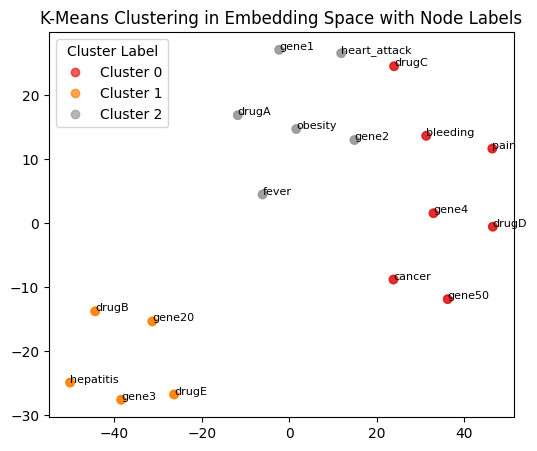

In [21]:
from sklearn.cluster import KMeans

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

plt.figure(figsize=(6, 5))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7)
plt.legend(handles=plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                               c=cluster_labels, cmap=plt.cm.Set1, alpha=0.7).legend_elements()[0], 
                               labels=[f'Cluster {i}' for i in range(num_clusters)], title='Cluster Label')

for i, node in enumerate(G.nodes()):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], node, fontsize=8)

plt.title('K-Means Clustering in Embedding Space with Node Labels')
plt.show()

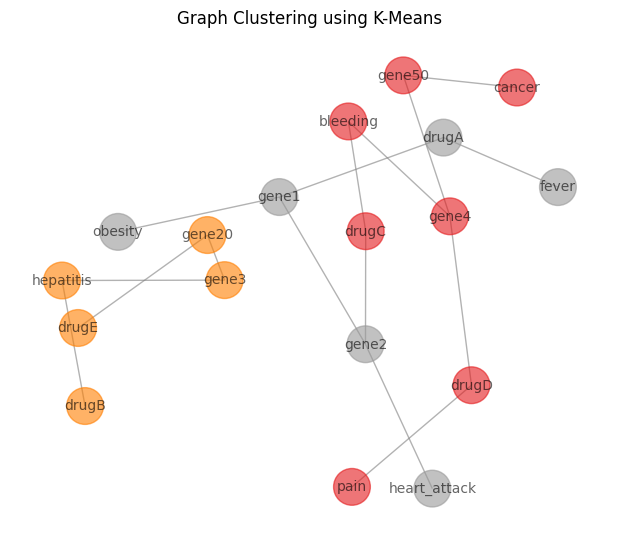

In [20]:
plt.figure(figsize=(6, 5))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, 
        cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using K-Means')

plt.show()

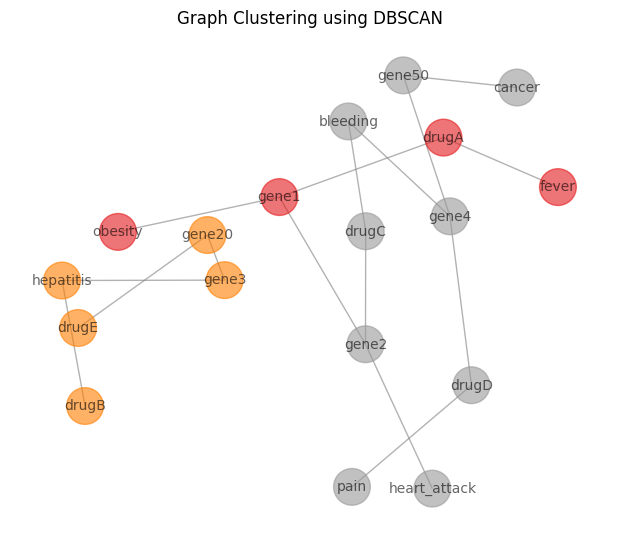

In [22]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering on node embeddings
dbscan = DBSCAN(eps=1.0, min_samples=2) # Adjust eps and min_samples
cluster_labels = dbscan.fit_predict(embeddings)

# Visualize clusters
plt.figure(figsize=(6, 5))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, node_color=cluster_labels, cmap=plt.cm.Set1, edge_color='gray', alpha=0.6)
plt.title('Graph Clustering using DBSCAN')
plt.show()